### Student Dropout.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

!pip install lightgbm
from lightgbm import LGBMClassifier
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset from CSV file

In [2]:
student = pd.read_csv('/Users/sandi/Student_Dropout/data.csv')

#### Once this data is in the DataFrame, we will perform following steps:
1. Understand the data
2. Pre-processing, Exploratory Data Analysis (EDA), Feature Selection
3. Extract Input and Output columns
4. Scaling the values
5. Splitting the data into Training & Testing Data
6. Training the model
7. Evaluate the model & Select the Model
8. Model Tuning
9. Model Deployement

## **Understanding the data**

In [3]:
# check the shape of the dataset in student DataFrame
student.shape

(4424, 35)

In [4]:
# See which are the 35 columns
student.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
# How the data looks
student.sample(4)


Marital status  Application mode  Application order  Course  \
3938               1                 1                  2      12   
3711               1                15                  1       2   
3732               1                 1                  3       2   
4226               1                 8                  2       3   

      Daytime/evening attendance  Previous qualification  Nacionality  \
3938                           1                       1            1   
3711                           1                      14            1   
3732                           1                       1            1   
4226                           0                       1            1   

      Mother's qualification  Father's qualification  Mother's occupation  \
3938                      13                       1                    6   
3711                      13                      28                   10   
3732                       4                       3                    2   
4226                      13                       1                    6   

      ...  Curricular units 2nd sem (credited)  \
3938  ...                                    0   
3711  ...                                    0   
3732  ...                                    0   
4226  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
3938                                    8   
3711                                    0   
3732                                    0   
4226                                    6   

      Curricular units 2nd sem (evaluations)  \
3938                                       9   
3711                                       0   
3732                                       0   
4226                                      11   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
3938                                    8                         15.127778   
3711                                    0                          0.000000   
3732                                    0                          0.000000   
4226                                    6                         11.500000   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
3938                                               0               11.1   
3711                                               0               15.5   
3732                                               0               12.7   
4226                                               0                9.4   

      Inflation rate   GDP    Target  
3938             0.6  2.02  Graduate  
3711             2.8 -4.06   Dropout  
3732             3.7 -1.70  Graduate  
4226            -0.8 -3.12   Dropout  

[4 rows x 35 columns]

In [6]:
student.head(5) 

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [7]:
# Check info about all the columns 
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## **Pre-processing**

### Looks like there are no nulls or duplicates but still we can check and handle if required.

In [8]:
print(student.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [9]:
print(student.duplicated().sum())

0


#### Only **Target** column is non-numeric which we can convert to numeric
#### Note that **Target** column is a output column so we need it in numeric form so that we can find it's correlation with others

In [10]:
student['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

### So there are 3 unique values in target column which we can replace by 
* Dropout -> 0
* Enrolled -> 1
* Graduate -> 2

In [11]:
student['Target'] = student['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [12]:
# Check Target column, it must have filled with 0, 1 & 2
student

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [13]:
student.dtypes
# Target column is integer now

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [14]:
# Learn the data mathematically
student.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 2nd sem (credited)  \
count  ...                          4424.000000   
mean   ...                             0.541817   
std    ...                             1.918546   
min    ...                             0.000000   
25%    ...                             0.000000   
50%    ...                             0.000000   
75%    ...                             0.000000   
max    ...                            19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              4.435805                         10.230206   
std                               3.014764                          5.210808   
min                               0.000000                          0.000000   
25%                               2.000000                         10.750000   
50%                               5.000000                         12.200000   
75%                               6.000000                         13.333333   
max 

### Finally find the correlation of Target with all other numeric columns

In [15]:
student.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

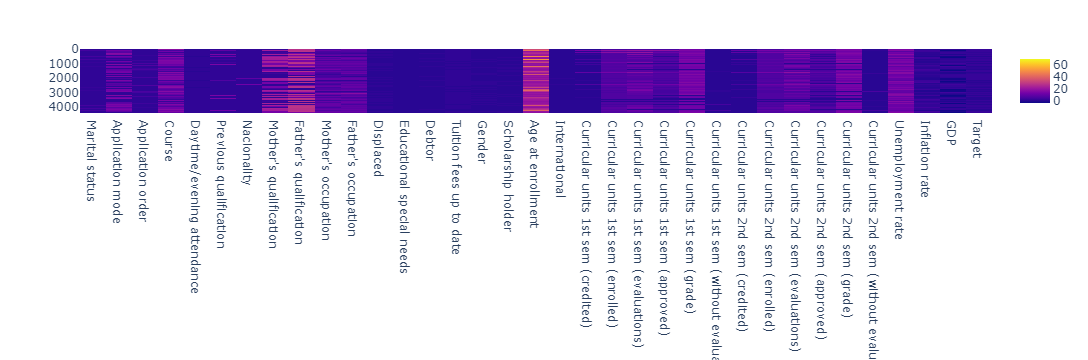

In [16]:
fig = px.imshow(student)
fig.show()

### Looking at the corelation, we need to select the required columns for prediction.

In [17]:
# This is the new Df considering relevant input and output columns
student_df = student.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]

In [18]:
student_df.head()

Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                 8          1       0                        1       1   
1                 6          1       0                        0       1   
2                 1          1       0                        0       1   
3                 8          1       0                        1       0   
4                12          0       0                        1       0   

   Scholarship holder  Age at enrollment  Curricular units 1st sem (enrolled)  \
0                   0                 20                                    0   
1                   0                 19                                    6   
2                   0                 19                                    6   
3                   0                 20                                    6   
4                   0                 45                                    6   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (approved)  \
0                                    0                                    0   
1                                    6                                    6   
2                                    6                                    0   
3                                    6                                    5   
4                                    6                                    6   

   Curricular units 2nd sem (grade)  Target  
0                          0.000000       0  
1                         13.666667       2  
2                          0.000000       0  
3                         12.400000       2  
4                         13.000000       2

In [19]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application mode                     4424 non-null   int64  
 1   Displaced                            4424 non-null   int64  
 2   Debtor                               4424 non-null   int64  
 3   Tuition fees up to date              4424 non-null   int64  
 4   Gender                               4424 non-null   int64  
 5   Scholarship holder                   4424 non-null   int64  
 6   Age at enrollment                    4424 non-null   int64  
 7   Curricular units 1st sem (enrolled)  4424 non-null   int64  
 8   Curricular units 1st sem (approved)  4424 non-null   int64  
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (enrolled)  4424 non-null   int64  
 11  Curricular units 2nd sem (appr

<Axes: >

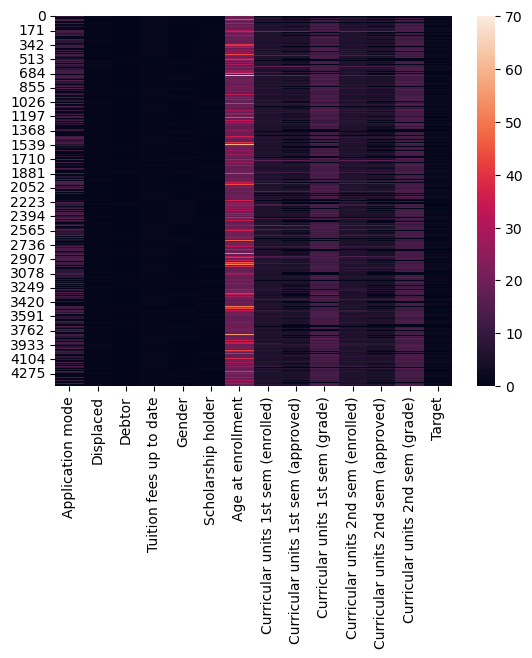

In [20]:

sns.heatmap(student_df)

## **EDA -  We will perform Exploratory Data Analysis on student_df**

In [21]:
# How many dropouts, enrolled & graduates are there in Target column
student_df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

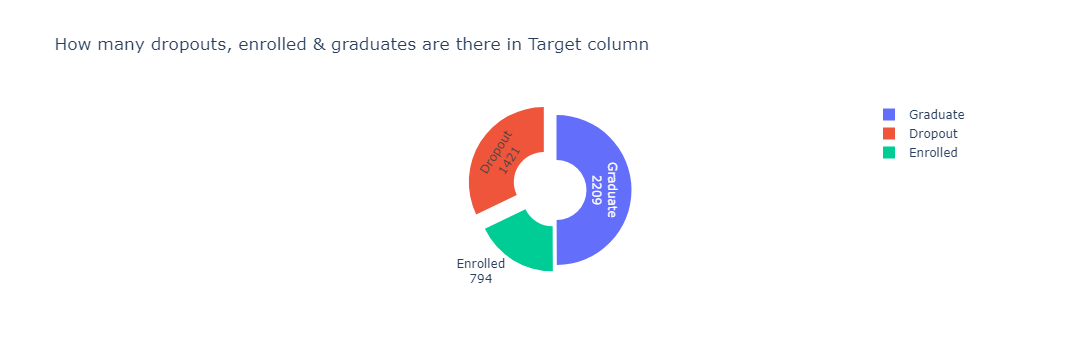

In [22]:
# Plot the above values
x = student_df['Target'].value_counts().index
y = student_df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [23]:
# Now see the corelation of Target with the rest
student_df.corr()['Target']

Application mode                      -0.212025
Displaced                              0.113986
Debtor                                -0.240999
Tuition fees up to date                0.409827
Gender                                -0.229270
Scholarship holder                     0.297595
Age at enrollment                     -0.243438
Curricular units 1st sem (enrolled)    0.155974
Curricular units 1st sem (approved)    0.529123
Curricular units 1st sem (grade)       0.485207
Curricular units 2nd sem (enrolled)    0.175847
Curricular units 2nd sem (approved)    0.624157
Curricular units 2nd sem (grade)       0.566827
Target                                 1.000000
Name: Target, dtype: float64

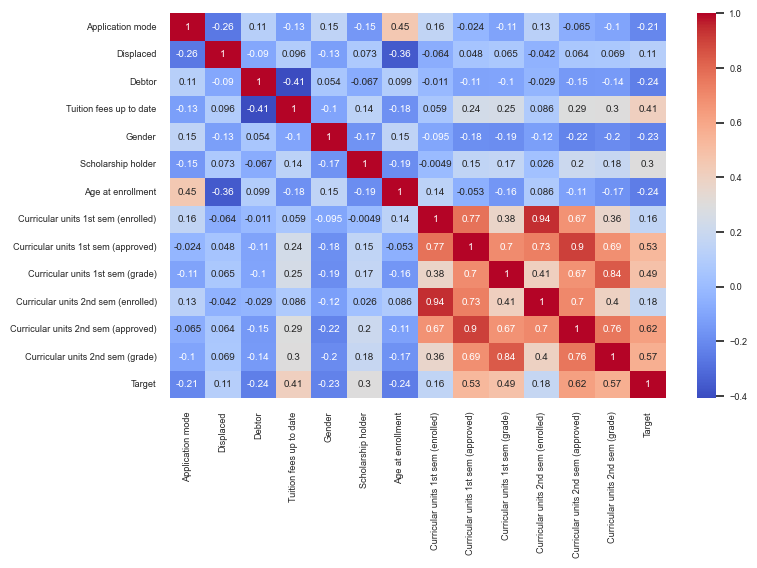

In [24]:
# Pearson's correlation (with heatmap and coolwarm color)
plt.figure(figsize=(8,5))
sns.set(font_scale=0.6)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(student_df.corr(), annot=True, cmap="coolwarm");

### Let's plot the column ***Curricular units 2nd sem (approved)*** againt ***Curricular units 1st sem (approved)*** and differentiate ***Target*** by color

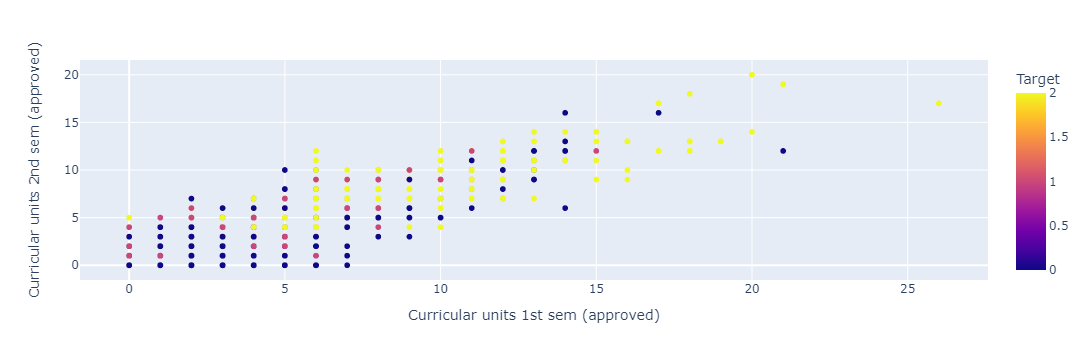

In [25]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

### Let's plot the column ***Curricular units 1st sem (grade)*** againt ***Curricular units 1st sem (grade)*** and differentiate ***Target*** by color

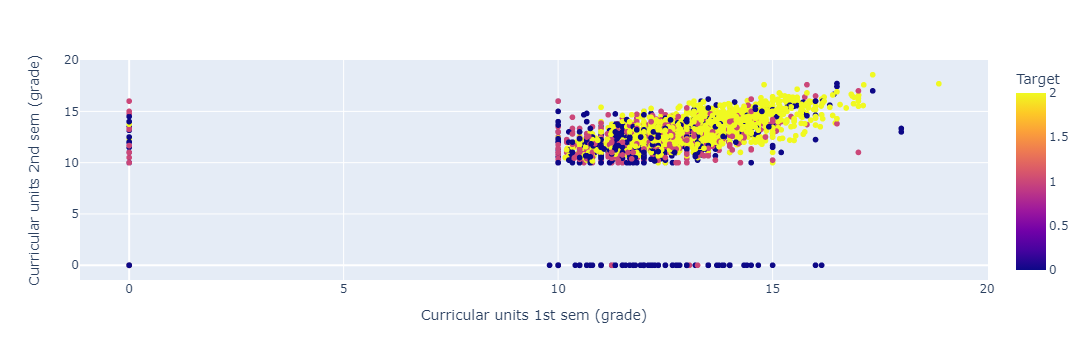

In [26]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             color = 'Target')
fig.show()

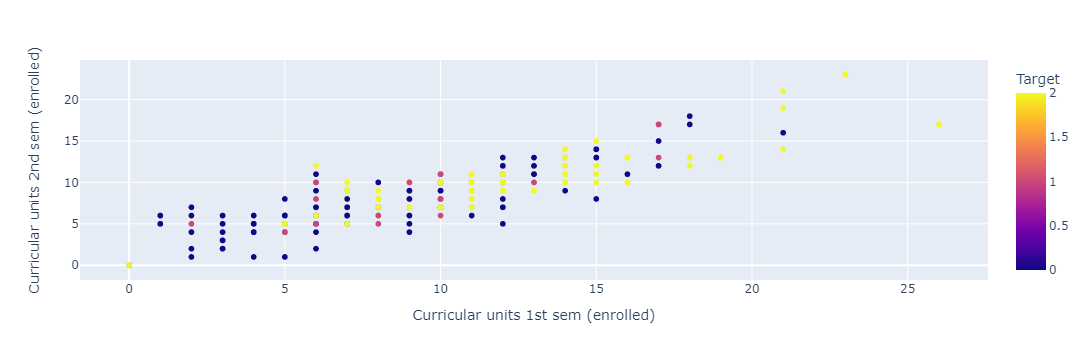

In [27]:
fig = px.scatter(student_df, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

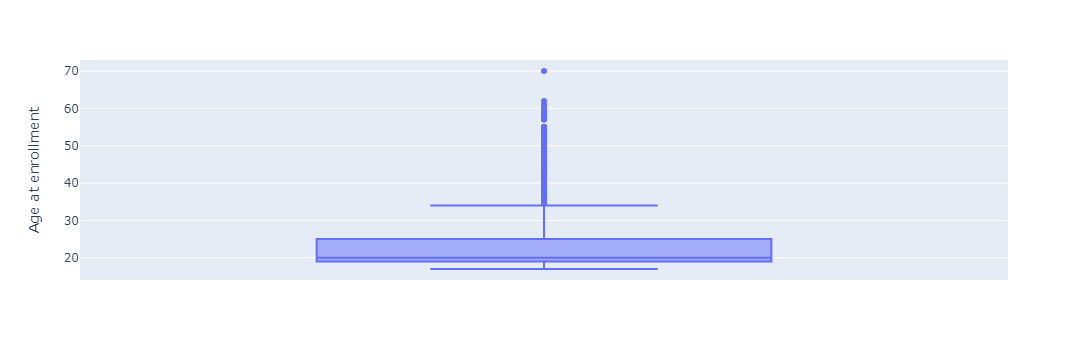

In [28]:
fig = px.box(student_df, y='Age at enrollment')
fig.show()

<Axes: xlabel='Age at enrollment', ylabel='Count'>

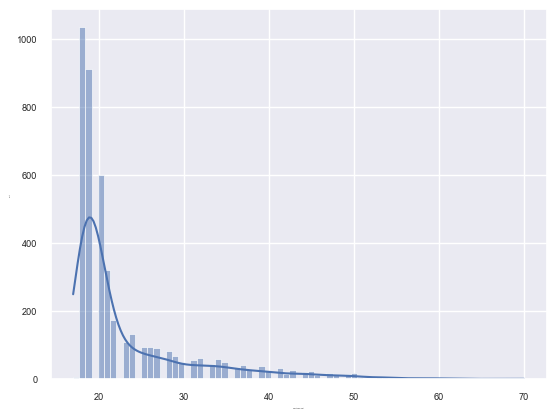

In [29]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=student_df['Age at enrollment'], kde=True)

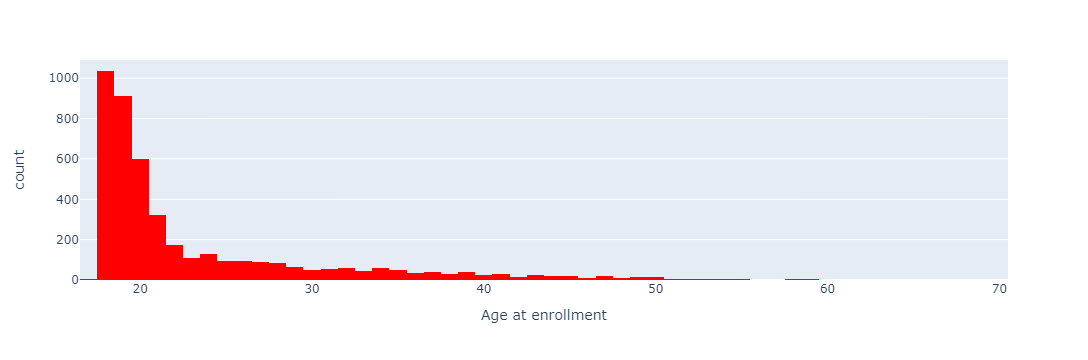

In [30]:
# Let's try plotly histogram for interactive figure
px.histogram(student_df['Age at enrollment'], x='Age at enrollment',color_discrete_sequence=['red'])

## Extract Input & Output Columns

In [31]:
X = student_df.iloc[:,0:13]
y = student_df.iloc[:,-1]
X

Application mode  Displaced  Debtor  Tuition fees up to date  Gender  \
0                    8          1       0                        1       1   
1                    6          1       0                        0       1   
2                    1          1       0                        0       1   
3                    8          1       0                        1       0   
4                   12          0       0                        1       0   
...                ...        ...     ...                      ...     ...   
4419                 1          0       0                        1       1   
4420                 1          1       1                        0       0   
4421                 1          1       0                        1       0   
4422                 1          1       0                        1       0   
4423                 5          1       0                        1       0   

      Scholarship holder  Age at enrollment  \
0                      0                 20   
1                      0                 19   
2                      0                 19   
3                      0                 20   
4                      0                 45   
...                  ...                ...   
4419                   0                 19   
4420                   0                 18   
4421                   1                 30   
4422                   1                 20   
4423                   0                 22   

      Curricular units 1st sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    7   
4422                                    5   
4423                                    6   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                       0                          0.000000   
1                                       6                         14.000000   
2                                       0                          0.000000   
3                                       6                         13.428571   
4                                       5                         12.333333   
...                                   ...                               ...   
4419                                    5                         13.600000   
4420                                    6                         12.000000   
4421                                    7                         14.912500   
4422                                    5                         13.800000   
4423                                    6                         11.666667   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  
0                                       0                          0.000000  
1                                       6                         13.666667  
2                                       0                          0.000000  
3                                       5                         12.400000  
4                                       6                         13.000000  
...  

## **Splitting the data into Training & Testing Data**

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3539, 13)
(885, 13)
(3539,)
(885,)


## Metrics

In [34]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train).round(2)
    pred_test = model.predict(X_test).round(2)

    train_acc = model.score(X_train,y_train).round(2)
    test_acc = model.score(X_test,y_test).round(2)

    train_recall = metrics.recall_score(y_train,pred_train,average='micro').round(2)
    test_recall = metrics.recall_score(y_test,pred_test,average='micro').round(2)
    # Recall = minimizes false negatives

    train_precision = metrics.precision_score(y_train,pred_train,average='micro').round(2)
    test_precision = metrics.precision_score(y_test,pred_test,average='micro').round(2)
    # Precision = minimizes false positives

    train_f1 = f1_score(y_train,pred_train,average='micro').round(2)
    test_f1 = f1_score(y_test,pred_test,average='micro').round(2)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))

    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train,average='micro'))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test,average='micro'))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train,average='micro'))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test,average='micro'))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train,average='micro'))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test,average='micro'))

    return score_list # returns the list with train and test scores

In [35]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1,0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0,1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (4,3))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Training the model**

Accuracy on training set :  0.7651879061881888
Accuracy on test set :  0.7762711864406779
Recall on training set :  0.7651879061881888
Recall on test set :  0.7762711864406779
Precision on training set :  0.7651879061881888
Precision on test set :  0.7762711864406779
F1-Score on training set :  0.7651879061881888
F1-Score on test set :  0.7762711864406779
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       288
           1       0.56      0.32      0.41       154
           2       0.80      0.94      0.86       443

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885

accuracy score: 0.7762711864406779


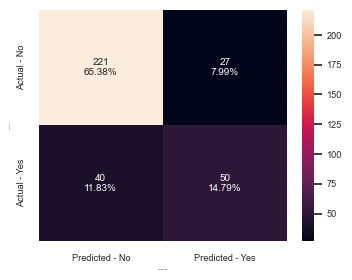

In [36]:
# Logistic Regression
model_lr = LogisticRegression(random_state=1)

# Fit the best algorithm to the data.
model_lr.fit(X_train, y_train)

y_hat = model_lr.predict(X_test)
y_hat

# Calculate metrics
get_metrics_score(model_lr)
make_confusion_matrix(model_lr, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

Accuracy on training set :  0.990392766318169
Accuracy on test set :  0.7084745762711865
Recall on training set :  0.990392766318169
Recall on test set :  0.7084745762711865
Precision on training set :  0.990392766318169
Precision on test set :  0.7084745762711865
F1-Score on training set :  0.990392766318169
F1-Score on test set :  0.7084745762711865
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       288
           1       0.44      0.45      0.44       154
           2       0.79      0.81      0.80       443

    accuracy                           0.71       885
   macro avg       0.65      0.65      0.65       885
weighted avg       0.71      0.71      0.71       885

accuracy score: 0.7084745762711865


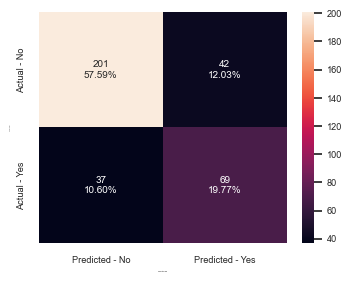

In [37]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=1)

# Fit the best algorithm to the data.
model_dt.fit(X_train, y_train)

y_hat = model_dt.predict(X_test)

# Calculate metrics
get_metrics_score(model_dt)
make_confusion_matrix(model_dt, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

Accuracy on training set :  0.9901102006216446
Accuracy on test set :  0.7559322033898305
Recall on training set :  0.9901102006216446
Recall on test set :  0.7559322033898305
Precision on training set :  0.9901102006216446
Precision on test set :  0.7559322033898305
F1-Score on training set :  0.9901102006216446
F1-Score on test set :  0.7559322033898305
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       288
           1       0.54      0.37      0.44       154
           2       0.78      0.91      0.84       443

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.74      0.76      0.74       885

accuracy score: 0.7559322033898305


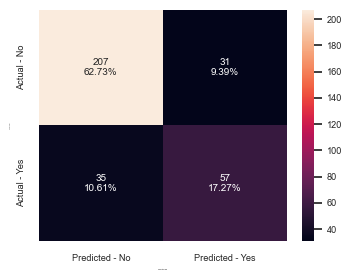

In [38]:
# Random Forest
model_rf = RandomForestClassifier()

# Fit the best algorithm to the data.
model_rf.fit(X_train, y_train)

y_hat = model_rf.predict(X_test)

# Calculate metrics
get_metrics_score(model_rf)
make_confusion_matrix(model_rf, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

Accuracy on training set :  0.7516247527550155
Accuracy on test set :  0.7491525423728813
Recall on training set :  0.7516247527550155
Recall on test set :  0.7491525423728813
Precision on training set :  0.7516247527550155
Precision on test set :  0.7491525423728813
F1-Score on training set :  0.7516247527550155
F1-Score on test set :  0.7491525423728814
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       288
           1       0.55      0.33      0.41       154
           2       0.74      0.96      0.84       443

    accuracy                           0.75       885
   macro avg       0.72      0.65      0.66       885
weighted avg       0.74      0.75      0.73       885

accuracy score: 663


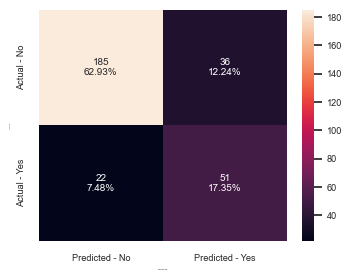

In [39]:
# Support Vector Machines (SVC)
model_svc = SVC(random_state=1)

# Fit the best algorithm to the data
model_svc.fit(X_train, y_train)

y_hat = model_svc.predict(X_test)

# Calculate metrics
get_metrics_score(model_svc)
make_confusion_matrix(model_svc, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=False))

Accuracy on training set :  0.9624187623622492
Accuracy on test set :  0.7502824858757062
Recall on training set :  0.9624187623622492
Recall on test set :  0.7502824858757062
Precision on training set :  0.9624187623622492
Precision on test set :  0.7502824858757062
F1-Score on training set :  0.9624187623622492
F1-Score on test set :  0.7502824858757062
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       288
           1       0.49      0.37      0.42       154
           2       0.80      0.90      0.85       443

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885

accuracy score: 0.7502824858757062


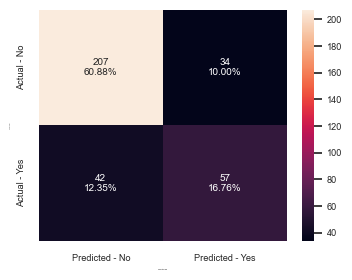

In [40]:
#XGBoost
model_xgb = xgb.XGBClassifier(random_state=1)

# Fit the best algorithm to the data.
model_xgb.fit(X_train, y_train)

y_hat = model_xgb.predict(X_test)

# Calculate metrics
get_metrics_score(model_xgb)
make_confusion_matrix(model_xgb, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 13
[LightGBM] [Info] Start training from score -1.138975
[LightGBM] [Info] Start training from score -1.710131
[LightGBM] [Info] Start training from score -0.695127
Accuracy on training set :  0.9234246962418763
Accuracy on test set :  0.7604519774011299
Recall on training set :  0.9234246962418763
Recall on test set :  0.7604519774011299
Precision on training set :  0.9234246962418763
Precision on test set :  0.7604519774011299
F1-Score on training set :  0.9234246962418763
F1-Score on test set :  0.76045197740113
              precision    recall  f1-score   suppo

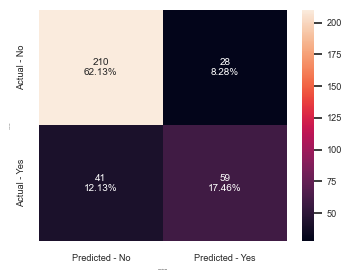

In [41]:
#LightGBM
model_lgb = lgb.LGBMClassifier(random_state=1)

# Fit the best algorithm to the data.
model_lgb.fit(X_train, y_train)

y_hat = model_lgb.predict(X_test)

# Calculate metrics
get_metrics_score(model_lgb)
make_confusion_matrix(model_lgb, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

Accuracy on training set :  0.9135348968635207
Accuracy on test set :  0.7762711864406779
Recall on training set :  0.9135348968635207
Recall on test set :  0.7762711864406779
Precision on training set :  0.9135348968635207
Precision on test set :  0.7762711864406779
F1-Score on training set :  0.9135348968635207
F1-Score on test set :  0.7762711864406779
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       288
           1       0.59      0.34      0.43       154
           2       0.79      0.94      0.86       443

    accuracy                           0.78       885
   macro avg       0.73      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885

accuracy score: 687


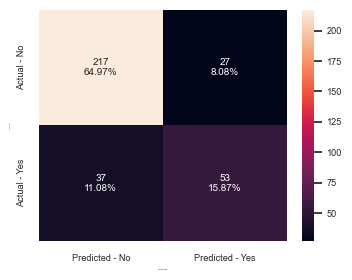

In [42]:
# Ensemble Model
ensemble_models = [
              ('Logistic Regression', LogisticRegression(random_state=1)),
              ('Random Forest', RandomForestClassifier(random_state=1)),
#              ('XGBoost', xgb.XGBClassifier(random_state=1)),
#              ('LightGBM', lgb.LGBMClassifier(random_state=1))
                ]

model_ens = VotingClassifier(ensemble_models, voting='soft')

# Fit the best algorithm to the data
model_ens.fit(X_train, y_train)

y_hat = model_ens.predict(X_test)

# Calculate metrics
get_metrics_score(model_ens)
make_confusion_matrix(model_ens, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=False))

In [43]:
# Identify the models to compare
models = [model_lr, model_dt, model_rf, model_svc, model_xgb, model_lgb, model_ens]

# Define empty lists to add results
#acc_train = []
acc_test = []
#recall_train = []
recall_test = []
#precision_train = []
precision_test = []
#f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:

    j = get_metrics_score(model,False)
#    acc_train.append(j[0])
    acc_test.append(j[1])
#    recall_train.append(j[2])
    recall_test.append(j[3])
#    precision_train.append(j[4])
    precision_test.append(j[5])
#    f1_train.append(j[6])
    f1_test.append(j[7])

comparison_frame = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree','Random Forest','SVC','XGBoost','LightGBM','Ensemble'],
                                          'Test_Accuracy': acc_test, 'F1_Test':f1_test, 'Test_Recall':recall_test, 'Test_Precision':precision_test
                                          })

#Sort models in decreasing order of Test Accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  Test_Accuracy  F1_Test  Test_Recall  Test_Precision
0  Logistic Regression           0.78     0.78         0.78            0.78
6             Ensemble           0.78     0.78         0.78            0.78
2        Random Forest           0.76     0.76         0.76            0.76
5             LightGBM           0.76     0.76         0.76            0.76
3                  SVC           0.75     0.75         0.75            0.75
4              XGBoost           0.75     0.75         0.75            0.75
1        Decision Tree           0.71     0.71         0.71            0.71

## **Tuned models**

In [44]:
! pip install scikit-optimize


# import BayesSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

### Logistic Regression

Accuracy on training set :  0.7651879061881888
Accuracy on test set :  0.7762711864406779
Recall on training set :  0.7651879061881888
Recall on test set :  0.7762711864406779
Precision on training set :  0.7651879061881888
Precision on test set :  0.7762711864406779
F1-Score on training set :  0.7651879061881888
F1-Score on test set :  0.7762711864406779
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       288
           1       0.56      0.32      0.41       154
           2       0.80      0.94      0.86       443

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.78      0.76       885

accuracy score: 0.7762711864406779


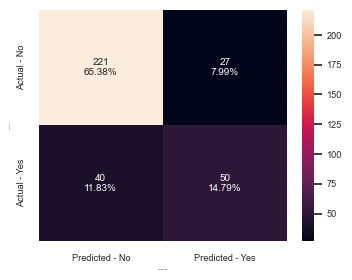

In [45]:
# Logistic Regression - Tuned
model_lr_tuned = LogisticRegression(random_state=1)

parameters = {
    'C': [0.01, 0.1, 1]
             }

# Run the grid search
grid = GridSearchCV(model_lr_tuned, parameters, n_jobs=-1)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_lr_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
model_lr_tuned.fit(X_train, y_train)

y_hat = model_lr_tuned.predict(X_test)

# Calculate metrics
get_metrics_score(model_lr_tuned)
make_confusion_matrix(model_lr_tuned, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))


Accuracy on training set :  0.7380615993218423
Accuracy on test set :  0.7378531073446327
Recall on training set :  0.7380615993218423
Recall on test set :  0.7378531073446327
Precision on training set :  0.7380615993218423
Precision on test set :  0.7378531073446327
F1-Score on training set :  0.7380615993218423
F1-Score on test set :  0.7378531073446326
              precision    recall  f1-score   support

           0       0.93      0.58      0.71       288
           1       0.51      0.36      0.42       154
           2       0.72      0.98      0.83       443

    accuracy                           0.74       885
   macro avg       0.72      0.64      0.65       885
weighted avg       0.75      0.74      0.72       885

accuracy score: 0.7378531073446327


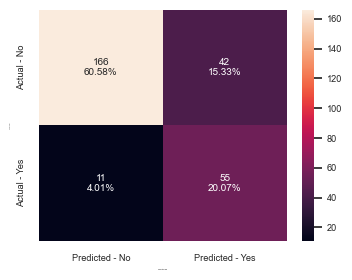

In [46]:
# Decision Tree - Tuned
model_dt_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,8), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Run the grid search
grid = GridSearchCV(model_dt_tuned, parameters, n_jobs=-1)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_dt_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
model_dt_tuned.fit(X_train, y_train)

y_hat = model_dt_tuned.predict(X_test)

# Calculate metrics
get_metrics_score(model_dt_tuned)
make_confusion_matrix(model_dt_tuned, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

Accuracy on training set :  0.8200056513139304
Accuracy on test set :  0.7717514124293785
Recall on training set :  0.8200056513139304
Recall on test set :  0.7717514124293785
Precision on training set :  0.8200056513139304
Precision on test set :  0.7717514124293785
F1-Score on training set :  0.8200056513139304
F1-Score on test set :  0.7717514124293785
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       288
           1       0.58      0.42      0.49       154
           2       0.77      0.95      0.85       443

    accuracy                           0.77       885
   macro avg       0.74      0.69      0.70       885
weighted avg       0.77      0.77      0.76       885

accuracy score: 0.7717514124293785


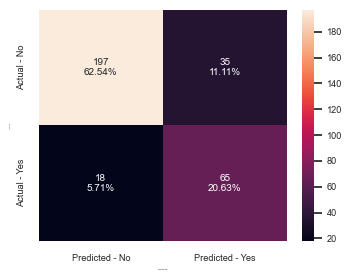

In [47]:
# Random Forest - Tuned
model_rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}

# Run the grid search
grid = GridSearchCV(model_rf_tuned, parameters, n_jobs=-1)
grid = grid.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_rf_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
model_rf_tuned.fit(X_train, y_train)

y_hat = model_rf_tuned.predict(X_test)

# Calculate metrics
get_metrics_score(model_rf_tuned)
make_confusion_matrix(model_rf_tuned, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
#print('auc:', round(metrics.roc_auc_score(y_test, y_pred), 2))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

Accuracy on training set :  0.7753602712630686
Accuracy on test set :  0.7649717514124293
Recall on training set :  0.7753602712630686
Recall on test set :  0.7649717514124293
Precision on training set :  0.7753602712630686
Precision on test set :  0.7649717514124293
F1-Score on training set :  0.7753602712630685
F1-Score on test set :  0.7649717514124293
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       288
           1       0.58      0.42      0.49       154
           2       0.77      0.95      0.85       443

    accuracy                           0.77       885
   macro avg       0.74      0.69      0.70       885
weighted avg       0.77      0.77      0.76       885

accuracy score: 683


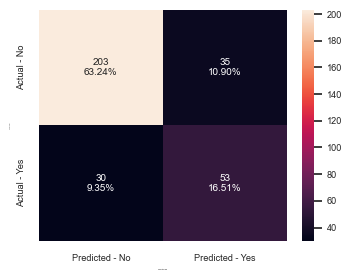

In [48]:
# Support Vector Machines (SVC) - Tuned
model_svc_tuned = SVC(random_state=1)

# define parameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
                  'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid']}

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)

# define the search
grid = GridSearchCV(model_svc_tuned, parameters, n_jobs=-1, cv=cv).fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_svc_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
model_svc_tuned.fit(X_train, y_train)

# Calculate metrics
get_metrics_score(model_svc_tuned)
make_confusion_matrix(model_svc_tuned, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=False))

[0 1 2] [1133  640 1766]
Accuracy on training set :  0.8578694546482057
Accuracy on test set :  0.7740112994350282
Recall on training set :  0.8578694546482057
Recall on test set :  0.7740112994350282
Precision on training set :  0.8578694546482057
Precision on test set :  0.7740112994350282
F1-Score on training set :  0.8578694546482057
F1-Score on test set :  0.7740112994350282
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       288
           1       0.58      0.42      0.49       154
           2       0.77      0.95      0.85       443

    accuracy                           0.77       885
   macro avg       0.74      0.69      0.70       885
weighted avg       0.77      0.77      0.76       885

auc: 0.45988860660543285
accuracy score: 0.7717514124293785


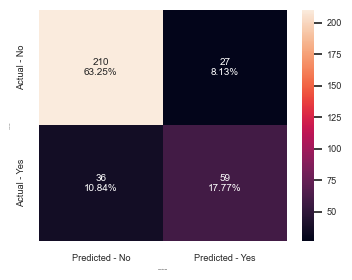

In [49]:
#XGBoost - Tuned
model_xgb_tuned = xgb.XGBClassifier(random_state=1)

unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

parameters = {
        'n_estimators': [10,30,50],
        'subsample':[0.7,0.9,1],
        'learning_rate':[0.05,0.1,0.2],
        'colsample_bytree':[0.7,0.9,1],
        'colsample_bylevel':[0.5,0.7,1]
}

# Run the grid search
grid = GridSearchCV(model_xgb_tuned, parameters, cv=5).fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_xgb_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
model_xgb_tuned.fit(X_train, y_train)

# Calculate metrics
get_metrics_score(model_xgb_tuned)
make_confusion_matrix(model_xgb_tuned, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
print('auc:', auc(fpr, tpr))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 13
[LightGBM] [Info] Start training from score -1.138975
[LightGBM] [Info] Start training from score -1.710131
[LightGBM] [Info] Start training from score -0.695127
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warni

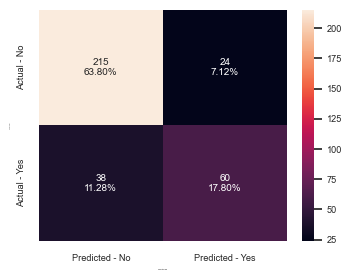

In [50]:
#LightGBM - Tuned
model_lgb_tuned = lgb.LGBMClassifier(random_state=1)

parameters = {
               'learning_rate': [0.001, 0.01, 0.1],
               'max_depth': [10, 20, 50],
               'min_child_samples': [5,50,100],
               'min_child_weight': [1, 3, 5],
               'subsample': [0.5, 0.7],
               'colsample_bytree': [0.5, 0.7, 0.9],
               'n_estimators' : [100, 200, 500]
            }

# Run the grid search
grid = GridSearchCV(model_lgb_tuned, parameters, cv=5,n_jobs=-1).fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_lgb_tuned = grid.best_estimator_

# Fit the best algorithm to the data.
model_lgb_tuned.fit(X_train, y_train)

# Calculate metrics
get_metrics_score(model_lgb_tuned)
make_confusion_matrix(model_lgb_tuned, y_test)
print(classification_report(y_true=y_test, y_pred=y_hat))
fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1)
print('auc:', auc(fpr, tpr))
print('accuracy score:', accuracy_score(y_true=y_test, y_pred=y_hat, normalize=True))

In [56]:
# Identify the models to compare
models = [model_lr, model_lr_tuned, model_dt, model_dt_tuned, model_rf, model_rf_tuned,
          model_svc, model_svc_tuned, model_xgb, model_xgb_tuned, model_lgb, model_lgb_tuned, model_ens]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:

    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [57]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Tuned Logistic Regression',
                                          'Decision Tree','Tuned Decision Tree','Random Forest', 'Tuned Random Forest',
                                          'SVC','Tuned SVC','XGBoost','Tuned XGBoost','LightGBM','Tuned LightGBM', 'Ensemble Model'],
                                          'F1_Train':f1_train, 'F1_Test':f1_test, 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          })

#Sort models in decreasing order of Test Accuracy
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

Model  F1_Train  F1_Test  Train_Accuracy  \
0         Logistic Regression      0.77     0.78            0.77   
1   Tuned Logistic Regression      0.77     0.78            0.77   
11             Tuned LightGBM      0.87     0.78            0.87   
12             Ensemble Model      0.91     0.78            0.91   
5         Tuned Random Forest      0.82     0.77            0.82   
9               Tuned XGBoost      0.86     0.77            0.86   
4               Random Forest      0.99     0.76            0.99   
7                   Tuned SVC      0.78     0.76            0.78   
10                   LightGBM      0.92     0.76            0.92   
6                         SVC      0.75     0.75            0.75   
8                     XGBoost      0.96     0.75            0.96   
3         Tuned Decision Tree      0.74     0.74            0.74   
2               Decision Tree      0.99     0.71            0.99   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
0            0.78          0.77         0.78             0.77            0.78  
1            0.78          0.77         0.78             0.77            0.78  
11           0.78          0.87         0.78             0.87            0.78  
12           0.78          0.91         0.78             0.91            0.78  
5            0.77          0.82         0.77             0.82            0.77  
9            0.77          0.86         0.77             0.86            0.77  
4            0.76          0.99         0.76             0.99            0.76  
7            0.76          0.78         0.76             0.78            0.76  
10           0.76          0.92         0.76             0.92            0.76  
6            0.75          0.75         0.75             0.75            0.75  
8            0.75          0.96         0.75             0.96            0.75  
3            0.74          0.74         0.74             0.74            0.74  
2            0.71          0.99         0.71             0.99            0.71

In [58]:
# Save the model
import joblib

joblib.dump(model_ens, 'model.joblib')

['model.joblib']

Note: you may need to restart the kernel to use updated packages.


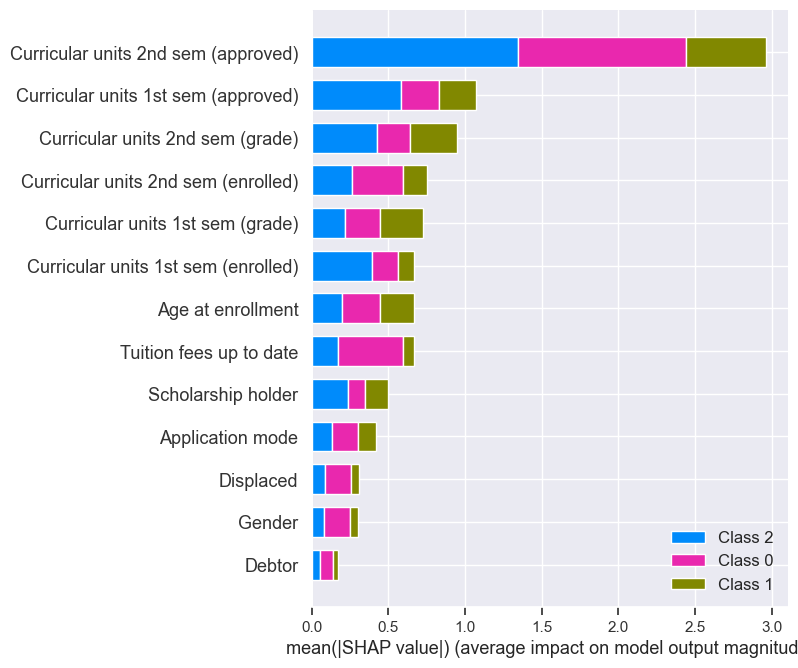

In [59]:
# Explainability with SHAP
# load JS visualization code to notebook

%pip install shap
import shap
shap.initjs()


# Using a random sample of the dataframe for better time computation
X_sampled = X_train.sample(1000, random_state=10)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_sampled)

# summarize the effects of all the features
shap.summary_plot(shap_values, X_sampled)